# Import libraries

In [1]:
# ! pip install faker 

In [10]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [3]:
fake = Faker()
start_date = datetime.strptime("2005-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

In [4]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [5]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [6]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [7]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)

cam_phone_number = fake.phone_number()
print(cam_phone_number)

+237 678835888


In [8]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = cam_phone_number
    registration_date = fake.date_between(start_date, end_date)
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:23<00:00, 430.14it/s]


(10000, 8)


In [9]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [11]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,37a7f4f9e9564c84a583e5587bb9e7e3,Steven,Oliver,Steven.Oliver@castro-estrada.com,+237 678835888,2021-06-23,1958-06-05,"58570 Lindsay Haven Apt. 681\nValerieland, NC ...",Bafoussam,Ouest
1,48a991a4138c477eb88793098c89fdc8,Rachel,Reynolds,Rachel.Reynolds@collins-le.com,+237 678835888,2012-01-29,1959-11-10,"8572 Cheryl Pine\nEmilyburgh, ID 10798",Bamenda,North-West
2,f6fa4bbd72fb4117b4061dc7ffdc5b0b,Daniel,Robinson,Daniel.Robinson@campbell.com,+237 678835888,2017-12-04,1977-03-27,"1787 Roman Springs Apt. 864\nBarbaraberg, MI 7...",Douala,Littoral
3,e45cb1df5fca4ec3aad3eb2c9972a2fe,Tony,Gill,Tony.Gill@coleman.com,+237 678835888,2006-10-06,1991-11-28,"788 Donald Meadow\nPatrickshire, MA 43049",Yaoundé,Centre
4,d5c1fa103b964445815bc08965020b3a,Alejandro,Tate,Alejandro.Tate@peterson.org,+237 678835888,2018-04-18,1990-09-25,"279 Wayne Bridge Suite 948\nRyanmouth, FL 11807",Yaoundé,Centre


In [12]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,ba5790348e2548e09151d15bb063dd9c,Deborah,Martin,Deborah.Martin@armstrong.com,+237 678835888,2019-12-24,1973-12-19,"PSC 6586, Box 8624\nAPO AE 61147",Bafoussam,Ouest
1,bc9aa5d33eaa4f749598a2e288476b0d,Roy,Bautista,Roy.Bautista@vasquez-cruz.com,+237 678835888,2021-05-04,1981-09-30,"39583 Jacob Cape\nNew Tonyton, AL 14709",Douala,Littoral
2,26ea861ebb22416e9b2a5b8f2643c5c2,Mary,Andrews,Mary.Andrews@medina-williams.com,+237 678835888,2015-08-10,1954-08-31,"PSC 2681, Box 9278\nAPO AE 57065",Douala,Littoral
3,6a67470601ac46c0871bb384aa033c53,William,Jones,William.Jones@ellis.com,+237 678835888,2006-09-05,1976-08-02,"5835 Hull Parks Apt. 494\nPearsonton, CT 53694",Douala,Littoral
4,b7788c6d7601407cb3d50683b5323d21,Anthony,Davidson,Anthony.Davidson@ramos.org,+237 678835888,2005-10-01,1991-08-30,"2384 James Orchard\nMariemouth, MP 03907",Bamenda,North-West


In [13]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,3521757089c54cac8cfd54f797ff581a,Gary,Smith,Gary.Smith@martinez.com,+237 678835888,2022-04-14,1979-10-28,"618 Cody Expressway Suite 045\nPort Brett, ME ...",Nkongsamba,Littoral
1,cd4c5f177a2246d6bae0e5b40da3ecdb,Calvin,Khan,Calvin.Khan@thomas.com,+237 678835888,2020-02-27,1978-08-09,"216 Christy Mount Apt. 879\nNew Emilyville, TX...",Yagoua,Extrême-Nord
2,97569dc084a543339915f9f950db09fd,Tammy,Moore,Tammy.Moore@fisher-khan.com,+237 678835888,2010-01-04,1980-01-15,"340 Burch Gateway Apt. 978\nSouth Brad, PR 56991",Ngou,Ouest
3,96ec4a90bc6a43e1b2124373edd84f91,Zachary,James,Zachary.James@marshall.com,+237 678835888,2020-04-24,1982-11-22,"3905 Harris Crescent\nLake James, NV 24476",Bamendjou,Ouest
4,efe2ba7c1a1b4157846a869a70ffb380,Katherine,Turner,Katherine.Turner@kaufman.com,+237 678835888,2011-05-25,1991-03-26,"866 Dakota Mission\nSouth Nicole, DE 44251",Mbandjok,Centre


In [14]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,37a7f4f9e9564c84a583e5587bb9e7e3,Steven,Oliver,Steven.Oliver@castro-estrada.com,+237 678835888,2021-06-23,1958-06-05,"58570 Lindsay Haven Apt. 681\nValerieland, NC ...",Bafoussam,Ouest
1,48a991a4138c477eb88793098c89fdc8,Rachel,Reynolds,Rachel.Reynolds@collins-le.com,+237 678835888,2012-01-29,1959-11-10,"8572 Cheryl Pine\nEmilyburgh, ID 10798",Bamenda,North-West
2,f6fa4bbd72fb4117b4061dc7ffdc5b0b,Daniel,Robinson,Daniel.Robinson@campbell.com,+237 678835888,2017-12-04,1977-03-27,"1787 Roman Springs Apt. 864\nBarbaraberg, MI 7...",Douala,Littoral
3,e45cb1df5fca4ec3aad3eb2c9972a2fe,Tony,Gill,Tony.Gill@coleman.com,+237 678835888,2006-10-06,1991-11-28,"788 Donald Meadow\nPatrickshire, MA 43049",Yaoundé,Centre
4,d5c1fa103b964445815bc08965020b3a,Alejandro,Tate,Alejandro.Tate@peterson.org,+237 678835888,2018-04-18,1990-09-25,"279 Wayne Bridge Suite 948\nRyanmouth, FL 11807",Yaoundé,Centre


In [15]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [16]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:07<00:00, 13920.61it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,76444acb-ad14-4b6a-a4bf-4c5922b5d70c,mobile,ios,dell,LATITUDE 7410,2021-06-18 11:24:26
1,48e0d71c-ac20-4ae1-a0e3-2c52ccd53f2f,tablette,ios,LG,spectre x3670,2024-02-19 23:36:29
2,04948850-1b65-4f59-af45-ea41add081d7,tablette,android,Apple,ipad pro,2023-11-02 00:28:57
3,4a774efb-1b38-4f07-8617-221dc1b737da,mobile,linux,Sharp,Aquos R6,2021-04-02 03:56:02
4,f8ec871c-ce6d-47af-8366-171c473668c0,tablette,ios,LG,Gram 17,2023-09-18 12:21:15
...,...,...,...,...,...,...
99995,035cc295-783f-4c4a-8f5c-18b96e542ae5,mobile,mac,SONY,Xperia 5 II,2020-11-03 03:16:58
99996,a8ad25c3-1b70-4416-899a-5b8c7f65e9aa,tablette,android,dell,XPS 13,2022-06-10 18:23:03
99997,eac6beb1-9e92-4e79-a513-66a76886790e,tablette,mac,Sharp,aquos sense 5g,2023-04-29 10:19:12
99998,efa4e6a0-c4f8-4cd2-9fab-58b7b8efea34,tablette,android,Apple,iphone Xr,2021-08-11 14:43:27


In [329]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [17]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(transaction_type, amount, status):
    if status == "échouée":
        return 1
    elif (amount >= 9500000 and transaction_type in ["depôt", "transfert"]) or (amount >= 10000000 and transaction_type == "retrait"):
        return 1
    else:
        return 0

for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    amount = uniform(100, 10000000)
    transaction_date = fake.date_between(start_date, end_date)
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_type": transaction_type,
        "amount": amount,
        "transaction_date": transaction_date,
        "status": status,
        "is_fraud": is_fraud_trans(transaction_type, amount, status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [27:30<00:00, 60.60it/s] 


(100000, 8)


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud
0,0ada43d4c0874dcda604983e46ad912e,229c6075641a45e79b8c7ae5451d66b5,5786a4e9-c0f6-4704-af72-0255d60b8844,depôt,5.391673e+06,2010-04-28,réussie,0
1,90365cb271554ac9b8d7c514199a1f5a,4eb31969c9eb417bbfcc647b031d22c9,a0434d59-17d5-41af-aede-65db1f58171e,depôt,6.173482e+06,2012-04-01,réussie,0
2,8f579c439f75462eadc34d374cac0b84,837be8cb29824bb7adbe3a35d3b4eece,cd7ffa22-9495-43e4-9aab-d0dd31a518c2,depôt,4.967085e+06,2020-11-10,réussie,0
3,cabcee2f0939434daeb7ab26b822e2d9,1247826b228e4050b33502d97e244ab8,7f55f267-6506-45aa-9ab8-86fccc5d46ee,depôt,7.081271e+06,2007-08-26,réussie,0
4,e2b63c0ee2924a168530a3e172f40b63,dc8e690b19c942b6963e8cbd23274976,e90d4ef7-386f-4be0-9a43-a17d85c9c8f0,retrait,4.181414e+06,2023-09-11,réussie,0


In [18]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [19]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [20]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [21]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [23]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.shape 

(100000, 9)

In [24]:
transaction_df_final.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
amount              0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [26]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:13, 7400.12it/s]


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
0,0ada43d4c0874dcda604983e46ad912e,229c6075641a45e79b8c7ae5451d66b5,5786a4e9-c0f6-4704-af72-0255d60b8844,depôt,5.391673e+06,2010-04-28,réussie,0,Douala
1,90365cb271554ac9b8d7c514199a1f5a,4eb31969c9eb417bbfcc647b031d22c9,a0434d59-17d5-41af-aede-65db1f58171e,depôt,6.173482e+06,2012-04-01,réussie,0,Garoua
2,8f579c439f75462eadc34d374cac0b84,837be8cb29824bb7adbe3a35d3b4eece,cd7ffa22-9495-43e4-9aab-d0dd31a518c2,depôt,4.967085e+06,2020-11-10,réussie,0,Douala
3,cabcee2f0939434daeb7ab26b822e2d9,1247826b228e4050b33502d97e244ab8,7f55f267-6506-45aa-9ab8-86fccc5d46ee,depôt,7.081271e+06,2007-08-26,réussie,0,Garoua
4,e2b63c0ee2924a168530a3e172f40b63,dc8e690b19c942b6963e8cbd23274976,e90d4ef7-386f-4be0-9a43-a17d85c9c8f0,retrait,4.181414e+06,2023-09-11,réussie,0,Bamenda


### device_fraud

In [27]:
selection = pd.DataFrame(transaction_df_final.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:59, 1672.66it/s]


,transaction_id,customer_id,device_id,transaction_type,amount,transaction_date,status,is_fraud,location
0,0ada43d4c0874dcda604983e46ad912e,229c6075641a45e79b8c7ae5451d66b5,5786a4e9-c0f6-4704-af72-0255d60b8844,depôt,5.391673e+06,2010-04-28,réussie,0,Douala
1,90365cb271554ac9b8d7c514199a1f5a,4eb31969c9eb417bbfcc647b031d22c9,a0434d59-17d5-41af-aede-65db1f58171e,depôt,6.173482e+06,2012-04-01,réussie,1,Garoua
2,8f579c439f75462eadc34d374cac0b84,837be8cb29824bb7adbe3a35d3b4eece,cd7ffa22-9495-43e4-9aab-d0dd31a518c2,depôt,4.967085e+06,2020-11-10,réussie,0,Douala
3,cabcee2f0939434daeb7ab26b822e2d9,1247826b228e4050b33502d97e244ab8,7f55f267-6506-45aa-9ab8-86fccc5d46ee,depôt,7.081271e+06,2007-08-26,réussie,0,Garoua
4,e2b63c0ee2924a168530a3e172f40b63,dc8e690b19c942b6963e8cbd23274976,e90d4ef7-386f-4be0-9a43-a17d85c9c8f0,retrait,4.181414e+06,2023-09-11,réussie,1,Bamenda


<Axes: xlabel='is_fraud', ylabel='count'>

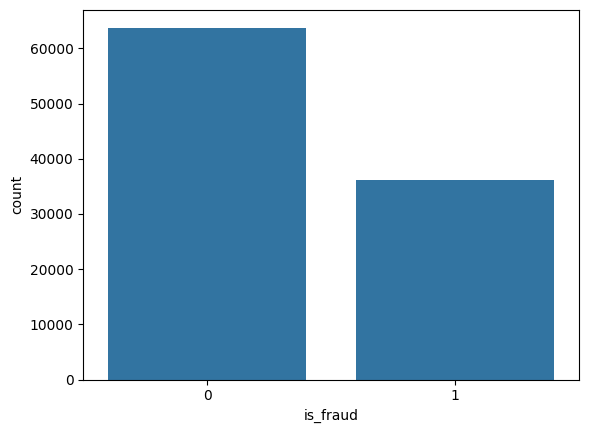

In [28]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [29]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [30]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:19, 5005.66it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,21b8ba5a1a1c448dbd62eb9e550dac45,229c6075641a45e79b8c7ae5451d66b5,0ada43d4c0874dcda604983e46ad912e,1.148362e+07,1.687529e+07,2010-04-28
1,92bec6fe070c4772aedcac2256701459,4eb31969c9eb417bbfcc647b031d22c9,90365cb271554ac9b8d7c514199a1f5a,1.523106e+07,2.140455e+07,2012-04-01
2,2273752862ad4eb79bff1721aea732dc,837be8cb29824bb7adbe3a35d3b4eece,8f579c439f75462eadc34d374cac0b84,6.798082e+06,1.176517e+07,2020-11-10
3,c99e26f4707f487390bd150f8680f307,1247826b228e4050b33502d97e244ab8,cabcee2f0939434daeb7ab26b822e2d9,9.092678e+06,1.617395e+07,2007-08-26
4,07ebb5e3d21a4cf5b0edd2442b4b56a7,dc8e690b19c942b6963e8cbd23274976,e2b63c0ee2924a168530a3e172f40b63,5.092153e+06,9.107390e+05,2023-09-11


In [31]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [32]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       37a7f4f9e9564c84a583e5587bb9e7e3
1       48a991a4138c477eb88793098c89fdc8
2       f6fa4bbd72fb4117b4061dc7ffdc5b0b
3       e45cb1df5fca4ec3aad3eb2c9972a2fe
4       d5c1fa103b964445815bc08965020b3a
                      ...               
9995    41ca2459e1ba45fc8b1383bed0276f47
9996    2135f92795f04d4b8c41bbcd96cc98ee
9997    c0896f56c2c847eca99a3d5904693410
9998    c322f5dc8e704d7da33b7cf0c1a180a0
9999    ecea1cde3171452b96d333df109a8c18
Name: customer_id, Length: 10000, dtype: object


In [33]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:24<00:00, 4068.28it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,5bd07b1c-8949-4667-9820-2814a9615f26,68e9c210139b4925ac0da56c2b0b9285,998.54,6,Martinland,mobile
1,44a6a9e7-ae15-42d4-a34e-eadc273020aa,f89c4eacccad4e609881309053df9efb,959.27,12,North Shannon,mobile
2,9e1434ba-39eb-43d8-91b2-792b5b68dd2a,2560f0cc325344668e78a4a73bc523af,150.12,9,West Jenniferstad,mobile
3,414acfd8-21b7-4d83-9a44-804d247a33d7,02d37d9b370c4c51aebfea9cdf317bee,37.85,22,West Regina,mobile
4,c1a2303a-6bf6-45cb-baab-2281165f965b,23e7c48f9d5f4025bd2ab6d02fea1961,45.21,27,Jamesland,mobile
...,...,...,...,...,...,...
99995,b6a7f0b9-b8b4-448a-8751-0d830b54c2f3,3728d8af777f4fa9825b34e1b10f3324,298.87,5,Chambersshire,tablette
99996,f9cb4c69-5c7e-49fd-9c37-a143426c06b7,ad32203d45e046aa970423a7177d04a1,878.49,7,East Jenniferbury,mobile
99997,084e5c3d-4f40-4125-a5ac-1e1c7b357014,d4b77e2d5050462a9a1251bf25b0d5e4,659.27,30,Sandyshire,mobile
99998,e4d083a4-e4c4-4375-961b-6d3e6c12a4fa,bdd88f12df004848ba8b68897c5d81cc,121.02,25,West Robertchester,tablette


In [34]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [35]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 2293.13it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,f96e3e6f-ecae-4faa-85e1-7c3a73d88888,fa5bbafb0eb64a8bb23068c26544be7c,2023-07-04 19:33:02,suspicious activity,closed,City consumer southern agent leader month. Wan...
1,47d7a345-d82c-4bdf-9868-ec1d3342c512,b753ebc5f0504a11a3e629139df7fe2f,2021-08-09 14:28:20,suspicious activity,closed,Somebody site fact major near. Republican grow...
2,a2f1e460-bbc7-4514-bc78-a3b15eb60f55,0155f99a385d4e96816943ab9eb30b59,2022-10-28 06:29:59,large transaction,closed,Rest spend partner effect real beat gun side.\...
3,76c224cd-c5bb-42c3-afe4-c6a917e8630b,ee32907df1164f31b77e2da26b61fd79,2022-06-25 18:16:49,large transaction,open,That piece stuff score smile. Quite page well ...
4,4f8c8d1b-bef6-4b30-a043-b1d18b834953,9716d230b7be48ad9daf806f01add298,2024-03-20 23:34:11,suspicious activity,open,Mean deal crime wife side bed. Until exactly k...
...,...,...,...,...,...,...
95,e3985edd-54e1-4cde-a6eb-8464bcaf3004,e280d3a2068e40828d7325fdb13636ac,2020-02-20 04:14:36,large transaction,closed,Ever I hope candidate pass. Watch as industry ...
96,47d5a05a-2f1a-440e-9a21-357f9fb6613b,4384075581fa49d69fc5ac960120a435,2021-11-25 07:41:00,suspicious activity,closed,Resource test local sense why under. Child ins...
97,84bd9321-7ee5-4e7f-998c-87b75407c500,fd152f89aacc4e54a30e4539af8b41d0,2023-02-18 09:55:03,suspicious activity,closed,Particular attack doctor. Trade situation car....
98,e0de73ed-6f56-4cba-b40c-9bd0ee0998ae,f6bd5ed941554318aed391a4ffe301b8,2024-05-03 23:58:20,large transaction,open,End source clear son fine. Something seem gas ...


In [36]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

## regions data

In [37]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [38]:
import os 
os.sep

'\\'

In [39]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'